# Loading data

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from preprocessing import *


# turn off warnings
import warnings
warnings.filterwarnings('ignore')

# show all rows with df.head
pd.options.display.max_columns = None

# model + pipelin
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, f1_score




/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# load data
df_complete = pd.read_csv('../data/final_large_dataset_complete_15-06-2024.csv', low_memory=False)
df_0_900 = pd.read_csv('../data/final_large_dataset_0_900_15-06-2024.csv', low_memory=False)
df_900_2000 = pd.read_csv('../data/final_large_dataset_900_2000_15-06-2024.csv', low_memory=False)
df_2000_2500 = pd.read_csv('../data/final_large_dataset_2000_2500_15-06-2024.csv', low_memory=False)

df_complete.head()

,Unnamed: 0.1,Unnamed: 0,TRAFFIC_DATE,TRAINNUMBER,TRAINSERIE,TRAINSERIE_DIRECTION,STATION,ACTIVITYTYPE,DISTANCE_M,PLAN_DATETIME,REALIZED_DATETIME,DELAY,TURNOVER_INDICATOR,PREVIOUS_TRAINNUMBER,COMBINE,SPLIT,ROLLINGSTOCK_TYPE,NUMBER_CARRIAGES,DRIVER_CHANGE,DEPARTURE_SIGNAL_SHOWS_SAFE,PLAN_TURNOVER_TIME,REALIZED_TURNOVER_TIME,MAX_DEPARTURE_TIME,PLAN_SIGNAL_SAFE_DELAY,REALIZED_SIGNAL_SAFE_DELAY,DALUREN,DAY_OF_WEEK,HOUR,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,HOUR_sin,HOUR_cos,NEEDED_PLAN_TURNOVER_TIME,NEEDED_REALIZED_TURNOVER_TIME,DIFF_TURNOVER_TIME,DIFF_TURNOVER_TIME_CAT
0,0,59,2023-01-01,650,600.0,E,Ut,V,0.0,2023-01-01 15:48:00+00:00,2023-01-01 15:48:10+00:00,10.0,1,NaN,0,0,ICM,7.0,1.0,2023-01-01 15:47:06+00:00,1200.0,1175.0,NaN,-54.0,-64.0,True,6,15,-0.781831,0.62349,-7.071068e-01,-0.707107,1250.0,1225.0,25.0,perfect
1,1,66,2023-01-01,657,600.0,O,Ut,V,0.0,2023-01-01 16:19:00+00:00,2023-01-01 16:19:03+00:00,3.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 16:18:07+00:00,2130.0,2086.0,NaN,-53.0,-56.0,True,6,16,-0.781831,0.62349,-8.660254e-01,-0.500000,2187.0,2143.0,44.0,perfect
2,2,288,2023-01-01,536,500.0,E,Ut,V,0.0,2023-01-01 12:18:00+00:00,2023-01-01 12:18:21+00:00,21.0,1,NaN,0,0,ICM,7.0,1.0,2023-01-01 12:17:07+00:00,420.0,393.0,NaN,-53.0,-74.0,True,6,12,-0.781831,0.62349,1.224647e-16,-1.000000,459.0,432.0,27.0,perfect
3,3,293,2023-01-01,540,500.0,E,Ut,V,0.0,2023-01-01 13:18:00+00:00,2023-01-01 13:18:00+00:00,0.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 13:17:07+00:00,420.0,391.0,NaN,-53.0,-53.0,True,6,13,-0.781831,0.62349,-2.588190e-01,-0.965926,480.0,451.0,29.0,perfect
4,4,305,2023-01-01,555,500.0,O,Ut,V,0.0,2023-01-01 15:49:00+00:00,2023-01-01 15:49:45+00:00,45.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 15:48:06+00:00,420.0,255.0,NaN,-54.0,-99.0,True,6,15,-0.781831,0.62349,-7.071068e-01,-0.707107,435.0,270.0,165.0,too late


# Feature composition

## All features

In [4]:
# all features
all_features = ['TRAFFIC_DATE', 'TRAINNUMBER', 'TRAINSERIE',
       'TRAINSERIE_DIRECTION', 'STATION', 'ACTIVITYTYPE', 'DISTANCE_M',
       'PLAN_DATETIME', 'REALIZED_DATETIME', 'DELAY', 'TURNOVER_INDICATOR',
       'PREVIOUS_TRAINNUMBER', 'COMBINE', 'SPLIT', 'ROLLINGSTOCK_TYPE',
       'NUMBER_CARRIAGES', 'DRIVER_CHANGE', 'DEPARTURE_SIGNAL_SHOWS_SAFE',
       'PLAN_TURNOVER_TIME', 'REALIZED_TURNOVER_TIME', 'MAX_DEPARTURE_TIME',
       'PLAN_SIGNAL_SAFE_DELAY', 'REALIZED_SIGNAL_SAFE_DELAY', 'DALUREN',
       'DAY_OF_WEEK', 'HOUR', 'DAY_OF_WEEK_sin', 'DAY_OF_WEEK_cos', 'HOUR_sin', 'HOUR_cos', 'NEEDED_PLAN_TURNOVER_TIME',
       'NEEDED_REALIZED_TURNOVER_TIME', 'DIFF_TURNOVER_TIME']

all_numeric_features = ['DISTANCE_M', 'NUMBER_CARRIAGES', 'PLAN_TURNOVER_TIME', 'MAX_DEPARTURE_TIME', 'PLAN_SIGNAL_SAFE_DELAY', 'DAY_OF_WEEK_sin', 'DAY_OF_WEEK_cos', 'HOUR_sin', 'HOUR_cos']

all_nominal_features = ['TRAINSERIE', 'STATION', 'ACTIVITYTYPE', 'ROLLINGSTOCK_TYPE', 'DRIVER_CHANGE',  'DALUREN', 'DAY_OF_WEEK', 'HOUR', 'TURNOVER_INDICATOR', 'TRAINNUMBER', 'PREVIOUS_TRAINNUMBER', 'COMBINE', 'SPLIT'] 

## Relevant features

In [5]:
# relevant features
numerical_importance_features = ['DISTANCE_M', 'NUMBER_CARRIAGES', 'PLAN_TURNOVER_TIME','HOUR_sin',	'HOUR_cos', 'DAY_OF_WEEK_sin',	'DAY_OF_WEEK_cos']

nominal_importance_features = ['TRAINSERIE','STATION', 'COMBINE', 'SPLIT', 'ROLLINGSTOCK_TYPE', 'DALUREN', 'DRIVER_CHANGE', ]

## General features

In [6]:
target_feature = ['DIFF_TURNOVER_TIME_CAT']

dream_tool_features = ['STATION', 'ROLLINGSTOCK_TYPE', 'NUMBER_CARRIAGES', 'DRIVER_CHANGE', 'REALIZED_DATETIME']

test_features = ['TRAINSERIE','STATION', 'COMBINE', 'SPLIT', 'ROLLINGSTOCK_TYPE','NUMBER_CARRIAGES', 'DRIVER_CHANGE',        'NEEDED_REALIZED_TURNOVER_TIME', 'DAY_IN_WEEK', 'DALUREN']

chosen_features = []

## Dream tool features

In [7]:
dream_tool_numeric_features = ['NUMBER_CARRIAGES', 'PLAN_TURNOVER_TIME', 'HOUR_sin',	'HOUR_cos', 'DAY_OF_WEEK_sin',	'DAY_OF_WEEK_cos']

dream_tool_nominal_features = ['STATION', 'ROLLINGSTOCK_TYPE', 'DRIVER_CHANGE']

## Minimal(?) features

these are used for final model

In [8]:
minimal_numeric_features = ['NUMBER_CARRIAGES', 'PLAN_TURNOVER_TIME','HOUR_sin',	'HOUR_cos', 'DAY_OF_WEEK_sin',	'DAY_OF_WEEK_cos']

minimal_nominal_features = ['TRAINSERIE','STATION', 'COMBINE', 'SPLIT', 'ROLLINGSTOCK_TYPE', 'DALUREN', 'DRIVER_CHANGE', ]

# Model feature extraction

feature selections random forest; https://towardsdatascience.com/data-preprocessing-and-interpreting-results-the-heart-of-machine-learning-part-2-pca-feature-92f8f6ec8c8


# Random Forest feature importance

### Feature subselection relevant

In [144]:
# numerical features
numeric_transformer = Pipeline(
  steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
# nominal features
nominal_transformer = Pipeline(
  steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ("selector", SelectPercentile(chi2, percentile=50)),
  ]
)

# preprocessing pipeline for encoding
preprocessor = ColumnTransformer(
  transformers=[
    ("numeric", numeric_transformer, numerical_importance_features),
    ("nominal", nominal_transformer, nominal_importance_features),
  ]
)

In [145]:
# split into X-feature and Y-target datasets
x = df_complete[all_features]
y = df_complete[target_feature]

# split train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
# 80% train, 20% test is generally recommended
x_train.head()

,TRAFFIC_DATE,TRAINNUMBER,TRAINSERIE,TRAINSERIE_DIRECTION,STATION,ACTIVITYTYPE,DISTANCE_M,PLAN_DATETIME,REALIZED_DATETIME,DELAY,TURNOVER_INDICATOR,PREVIOUS_TRAINNUMBER,COMBINE,SPLIT,ROLLINGSTOCK_TYPE,NUMBER_CARRIAGES,DRIVER_CHANGE,DEPARTURE_SIGNAL_SHOWS_SAFE,PLAN_TURNOVER_TIME,REALIZED_TURNOVER_TIME,MAX_DEPARTURE_TIME,PLAN_SIGNAL_SAFE_DELAY,REALIZED_SIGNAL_SAFE_DELAY,DALUREN,DAY_OF_WEEK,HOUR,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,HOUR_sin,HOUR_cos,NEEDED_PLAN_TURNOVER_TIME,NEEDED_REALIZED_TURNOVER_TIME,DIFF_TURNOVER_TIME
155025,2023-03-02,2981,2900.0,O,Ekz,V,NaN,2023-03-02 20:39:00+00:00,2023-03-02 20:39:04+00:00,4.0,1,3964.0,0,0,VIRM,6.0,1.0,2023-03-02 20:38:03+00:00,960.0,968.0,NaN,-57.0,-61.0,True,3,20,0.433884,-0.900969,-0.866025,0.500000,1016.0,1024.0,-8.0
216899,2023-04-19,3674,3600.0,E,Rsd,V,NaN,2023-04-19 19:57:00+00:00,2023-04-19 19:57:22+00:00,22.0,1,3665.0,0,0,DDZ,4.0,1.0,2023-04-19 19:56:10+00:00,1440.0,1459.0,NaN,-50.0,-72.0,True,2,19,0.974928,-0.222521,-0.965926,0.258819,1478.0,1497.0,-19.0
106285,2023-02-24,6086,6000.0,E,Ht,V,NaN,2023-02-24 23:33:00+00:00,2023-02-24 23:32:50+00:00,-10.0,1,6083.0,0,0,SLT,6.0,0.0,2023-02-24 23:32:07+00:00,300.0,305.0,NaN,-53.0,-43.0,True,4,23,-0.433884,-0.900969,-0.258819,0.965926,370.0,375.0,-5.0
178403,2023-03-16,1762,1700.0,E,Es,V,NaN,2023-03-16 16:46:00+00:00,2023-03-16 16:45:58+00:00,-2.0,1,1751.0,0,0,ICM,6.0,0.0,2023-03-16 16:45:08+00:00,1920.0,1863.0,NaN,-52.0,-50.0,False,3,16,0.433884,-0.900969,-0.866025,-0.500000,1982.0,1925.0,57.0
29808,2023-01-31,8131,8100.0,O,Zl,V,NaN,2023-01-31 10:52:00+00:00,2023-01-31 10:52:04+00:00,4.0,1,8134.0,0,0,SNG,4.0,1.0,2023-01-31 10:51:05+00:00,840.0,804.0,NaN,-55.0,-59.0,True,1,10,0.781831,0.623490,0.500000,-0.866025,896.0,860.0,36.0


In [146]:
# train the model 
# forest_classifier = Pipeline(
#   steps=[
#     ("preprocessor", preprocessor),
#     ("forest classifier", RandomForestClassifier(n_estimators=100, random_state=42)),
#   ]
# )


temp_nominal_data = df_complete[nominal_importance_features].apply(LabelEncoder().fit_transform)
temp_nominal_data.columns = nominal_importance_features

temp_numeric_data = df_complete[numerical_importance_features]
temp_numeric_data.columns = numerical_importance_features


temp_final = pd.concat([temp_nominal_data, temp_numeric_data], axis=1, ignore_index=True)
use_features = (nominal_importance_features + numerical_importance_features)
temp_final.columns = use_features

forest_feat_imp = RandomForestClassifier(n_estimators=100, random_state=42)

# split into X-feature and Y-target datasets
x = temp_final[use_features]
y = df_complete[target_feature]

# split train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
# 80% train, 20% test is generally recommended
# x_train.head()


forest_feat_imp.fit(x_train, y_train)
importance = forest_feat_imp.feature_importances_


number of columns: 14, which are: 
Index(['TRAINSERIE', 'STATION', 'COMBINE', 'SPLIT', 'ROLLINGSTOCK_TYPE',
       'DALUREN', 'DRIVER_CHANGE', 'DISTANCE_M', 'NUMBER_CARRIAGES',
       'PLAN_TURNOVER_TIME', 'HOUR_sin', 'HOUR_cos', 'DAY_OF_WEEK_sin',
       'DAY_OF_WEEK_cos'],
      dtype='object')


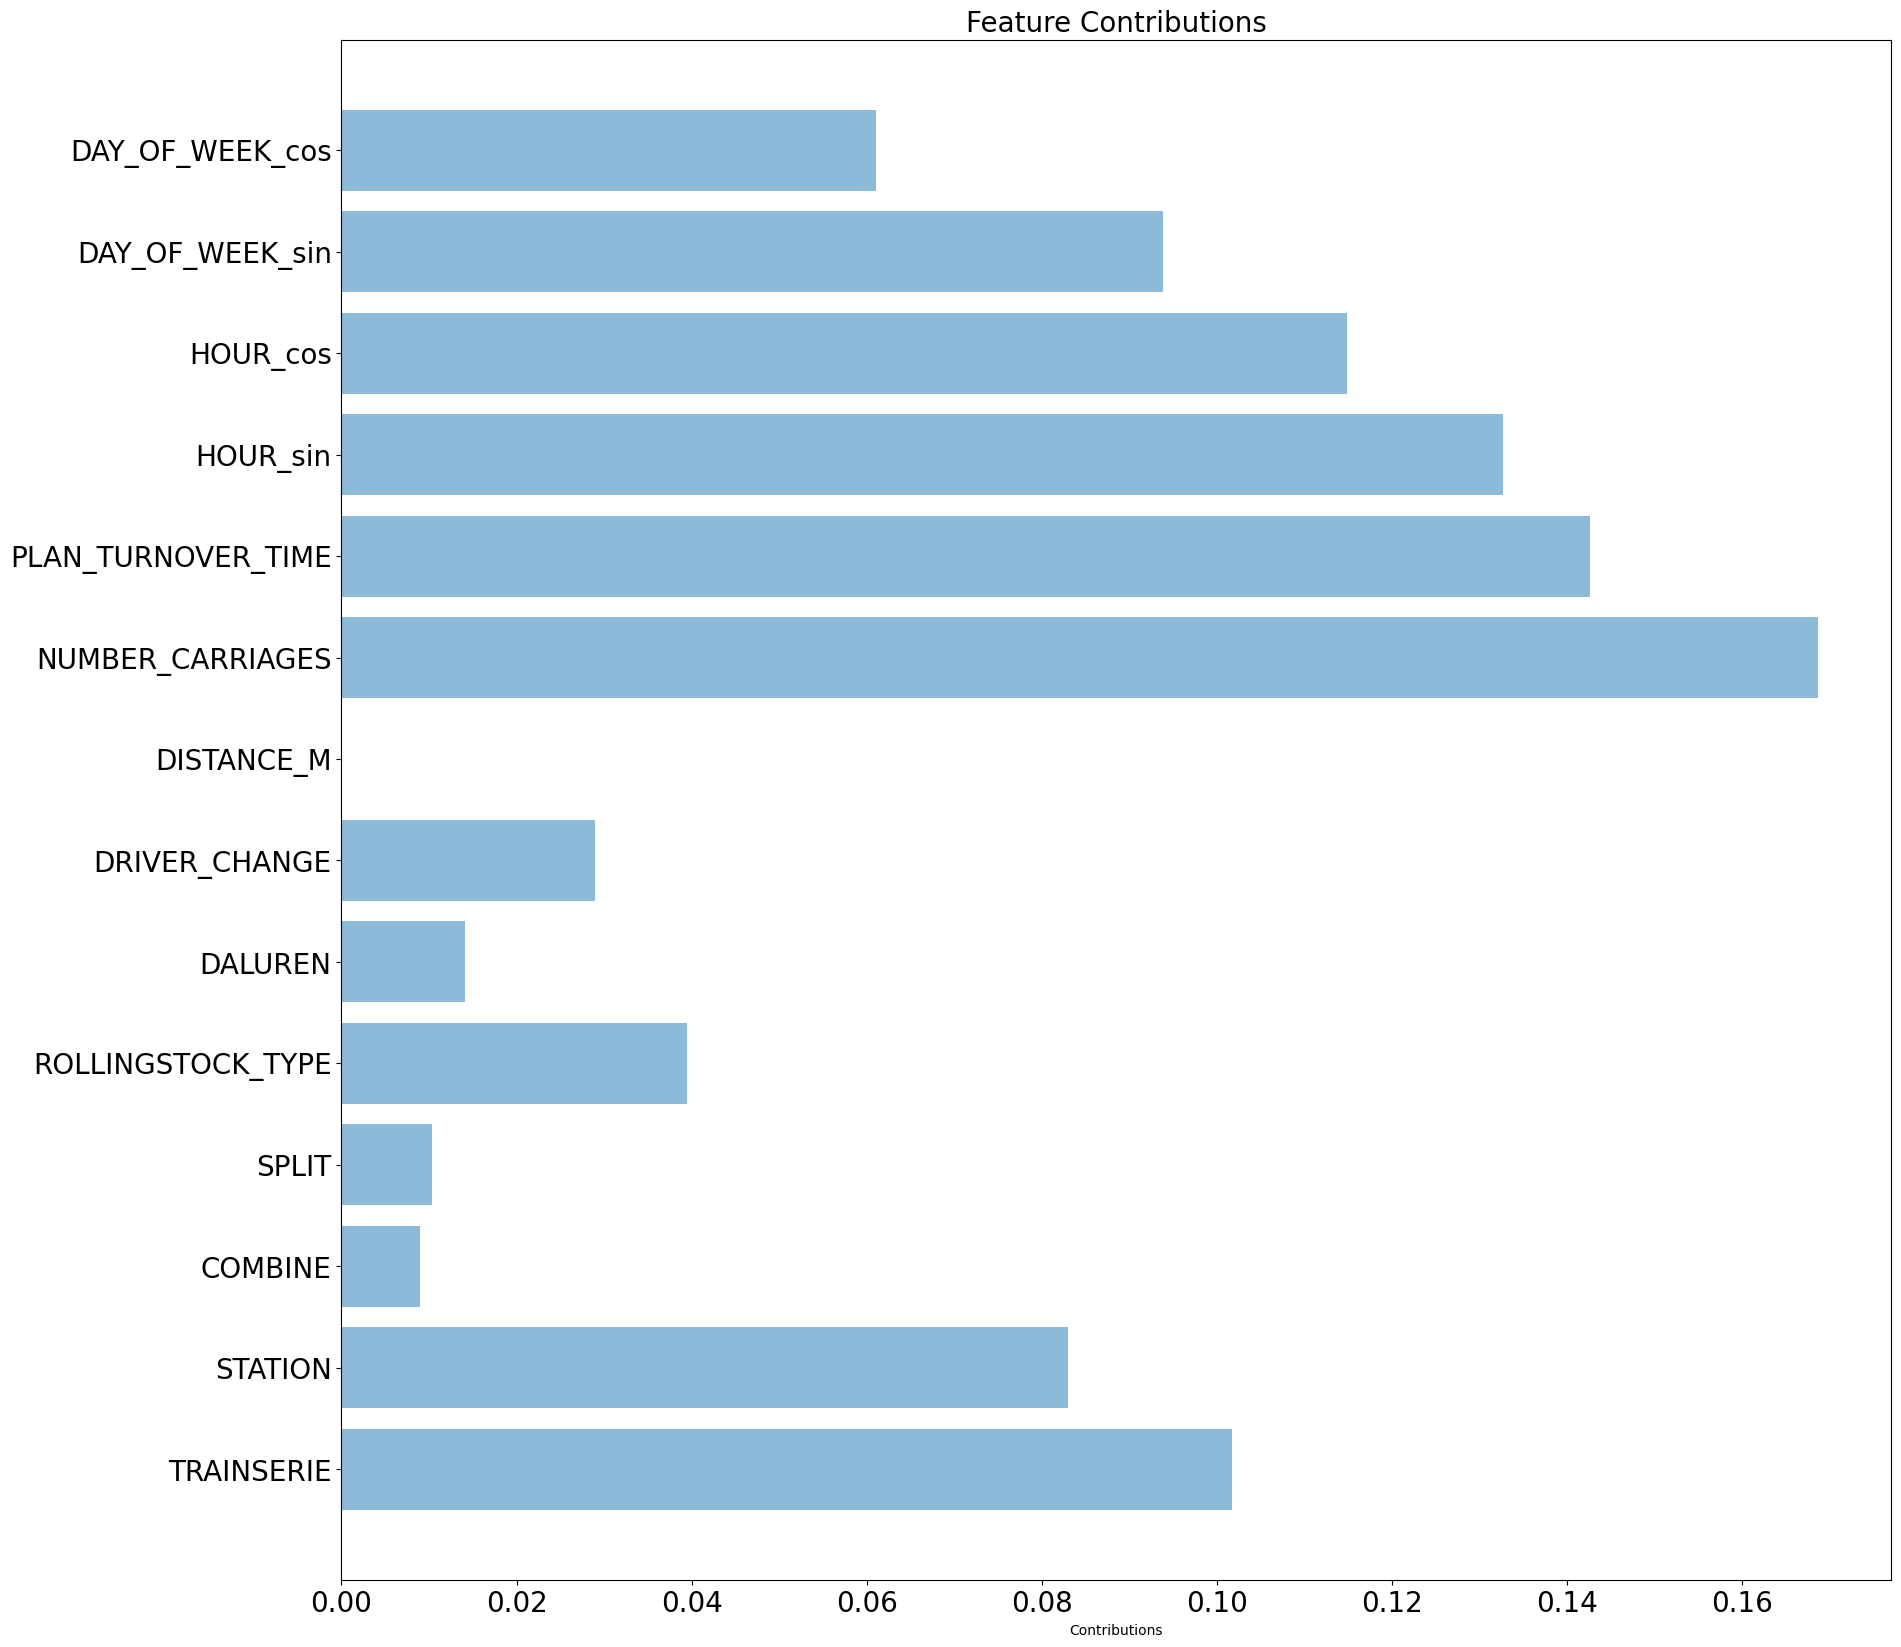

In [147]:
print(f"number of columns: {len(x.columns)}, which are: \n{x.columns}")

objects= x.columns
y_pos = np.arange(len(objects))
performance = importance

fig, ax = plt.subplots(figsize=(20, 20))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects,fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Contributions')
plt.title('Feature Contributions',fontsize=20)
plt.show()

Classification Report:
               precision    recall  f1-score   support

     perfect       0.79      0.93      0.85     36641
   too early       0.31      0.12      0.17      3959
    too late       0.32      0.13      0.18      6756

    accuracy                           0.75     47356
   macro avg       0.47      0.39      0.40     47356
weighted avg       0.68      0.75      0.70     47356

Results rbf SVC:
  Accuracy: 0.7468747360418955
  Precision: 0.6825768540781287
  Recall: 0.7468747360418955
  F1 score: 0.700945608910853


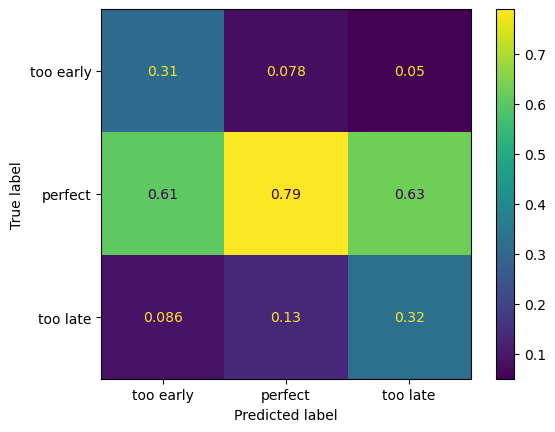

In [148]:
# make predictions on the test set
y_pred_forest_feat_imp = forest_feat_imp.predict(x_test)

# evaluate the model
classification_forest_feat_imp = classification_report(y_test, y_pred_forest_feat_imp)
print(f"Classification Report:\n {classification_forest_feat_imp}")

# Model Accuracy: how often is the classifier correct?
accuracy_forest_feat_imp = accuracy_score(y_test, y_pred_forest_feat_imp)
# Model Precision: what percentage of positive tuples are labeled as such?
precision_forest_feat_imp = precision_score(y_test, y_pred_forest_feat_imp, average='weighted')
# Model Recall: what percentage of positive tuples are labelled as such?
recall_forest_feat_imp = recall_score(y_test, y_pred_forest_feat_imp, average='weighted')
# Model f1: 
f1_forest_feat_imp = f1_score(y_test, y_pred_forest_feat_imp, average='weighted')

# printout
print(f"""Results rbf SVC:
  Accuracy: {accuracy_forest_feat_imp}
  Precision: {precision_forest_feat_imp}
  Recall: {recall_forest_feat_imp}
  F1 score: {f1_forest_feat_imp}""")

# Model confusion matrix: 
confmat_forest_feat_imp = confusion_matrix(y_test, y_pred_forest_feat_imp, labels = ['too early', 'perfect', 'too late'], normalize='pred')
# normalize over predicted conditions calculates the part per class/ column, so if we sum over the columns we get 1. So this shows best for the model how it performs per class
cm_display_forest_feat_imp = ConfusionMatrixDisplay(confmat_forest_feat_imp, display_labels=['too early', 'perfect', 'too late'])

cm_display_forest_feat_imp.plot()
plt.show()

### Feature subselection all

number of columns: 22, which are: 
Index(['TRAINSERIE', 'STATION', 'ACTIVITYTYPE', 'ROLLINGSTOCK_TYPE',
       'DRIVER_CHANGE', 'DALUREN', 'DAY_OF_WEEK', 'HOUR', 'TURNOVER_INDICATOR',
       'TRAINNUMBER', 'PREVIOUS_TRAINNUMBER', 'COMBINE', 'SPLIT', 'DISTANCE_M',
       'NUMBER_CARRIAGES', 'PLAN_TURNOVER_TIME', 'MAX_DEPARTURE_TIME',
       'PLAN_SIGNAL_SAFE_DELAY', 'DAY_OF_WEEK_sin', 'DAY_OF_WEEK_cos',
       'HOUR_sin', 'HOUR_cos'],
      dtype='object')


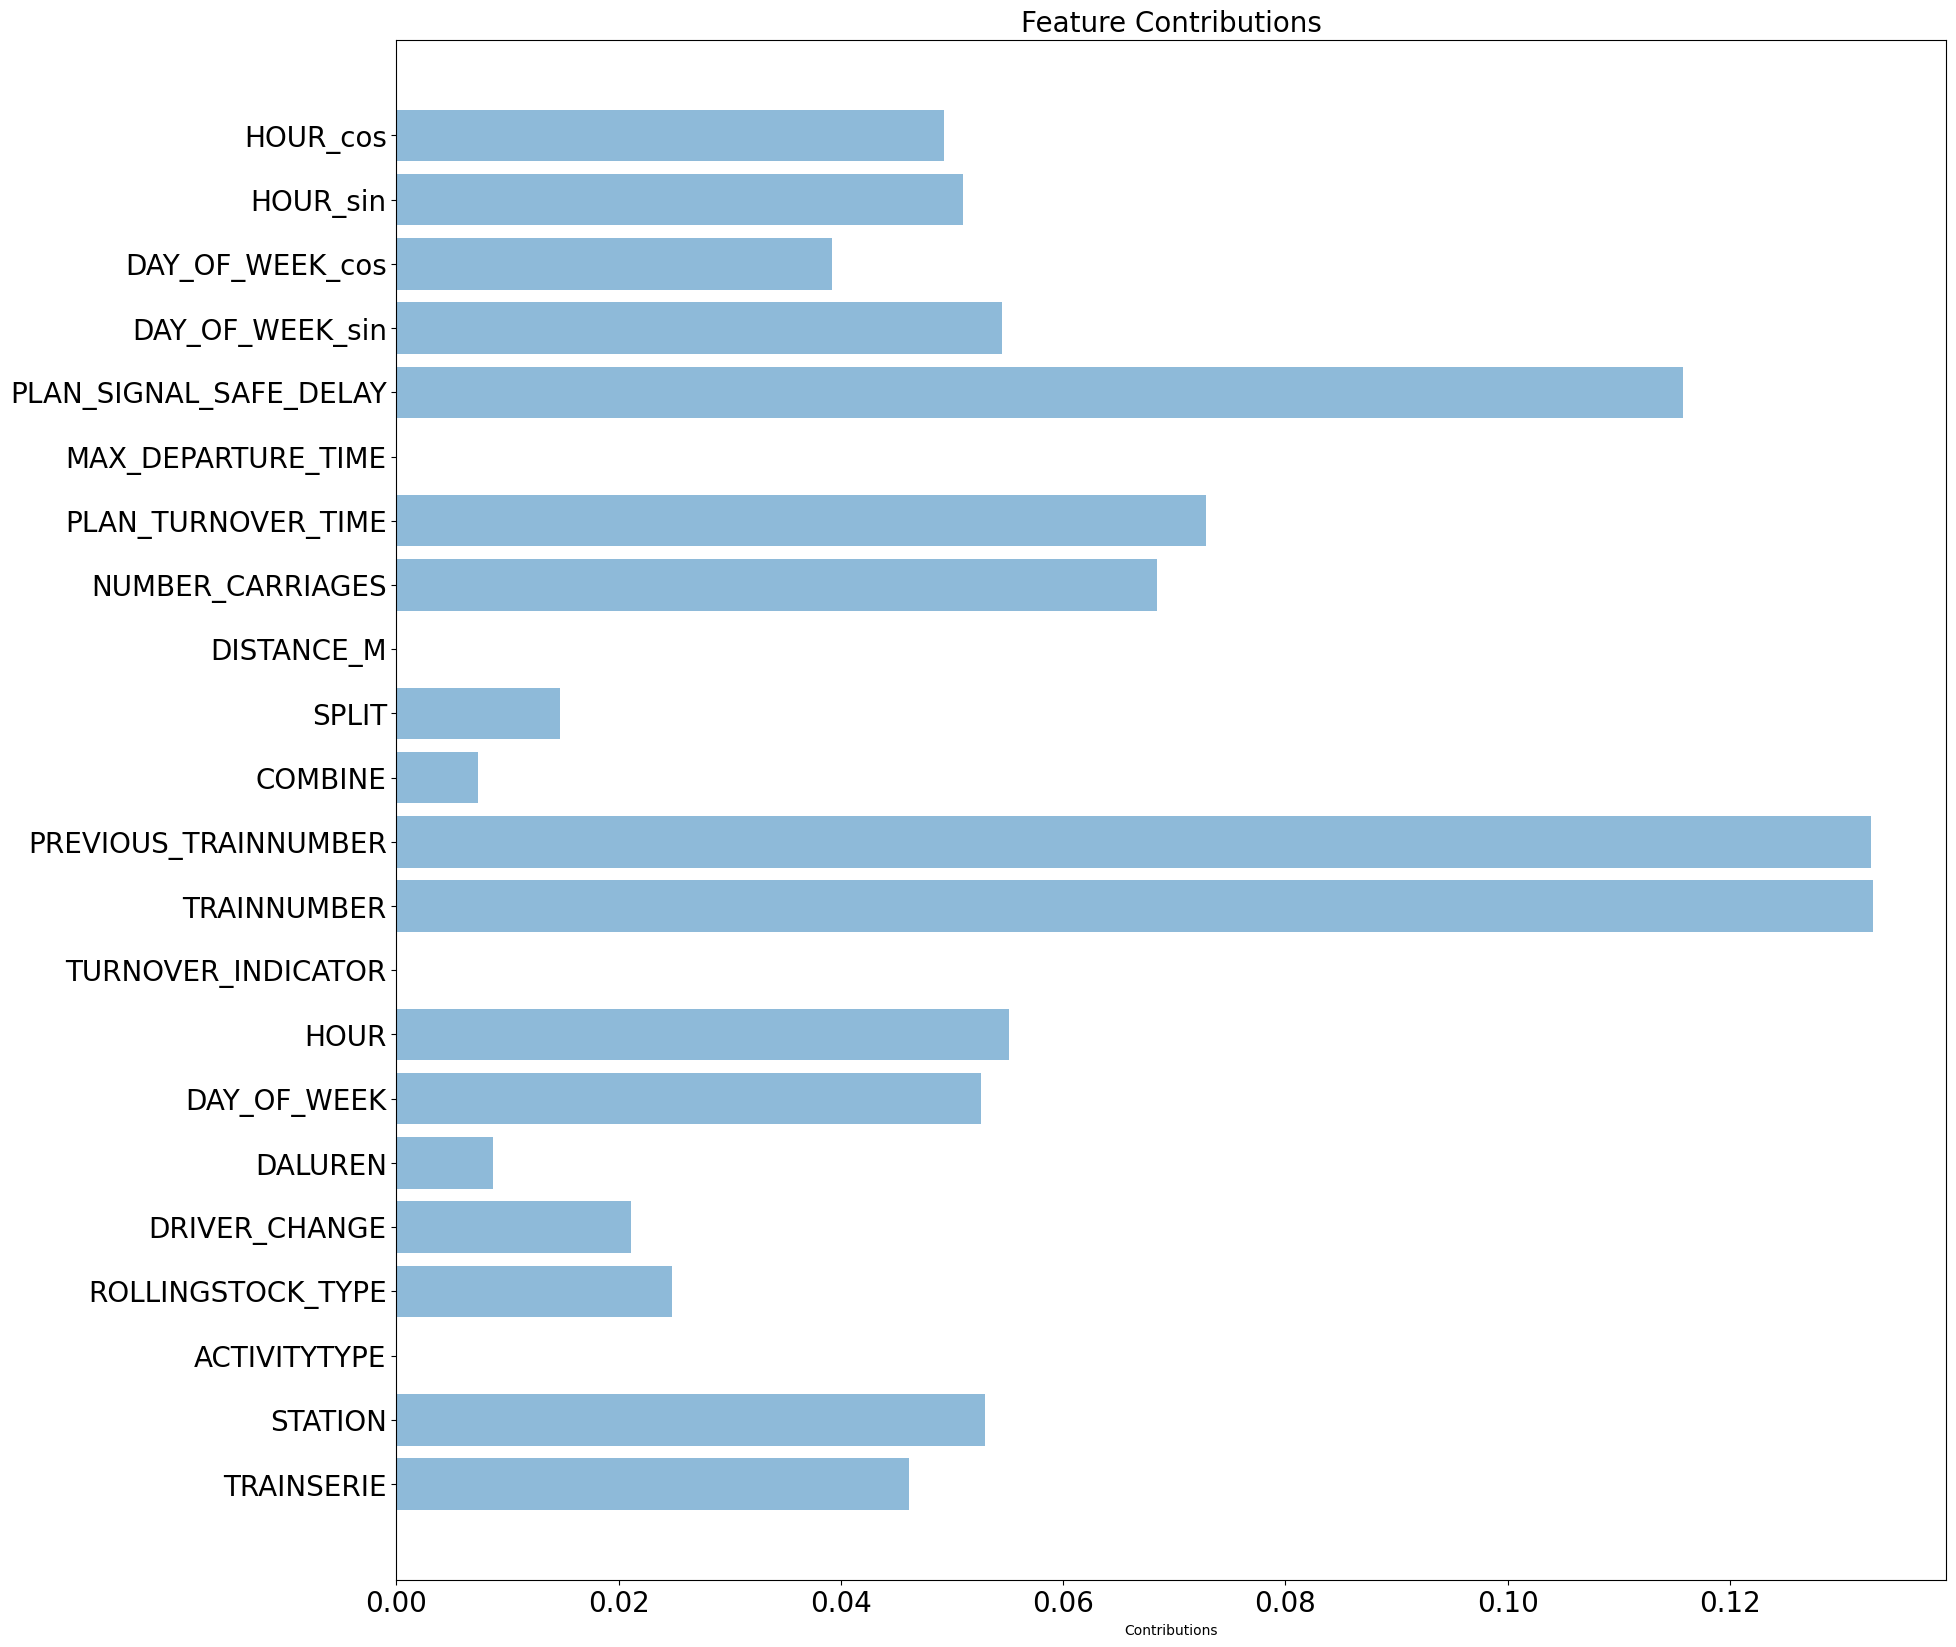

Classification Report:
               precision    recall  f1-score   support

     perfect       0.79      0.98      0.87     36805
   too early       0.49      0.07      0.13      3869
    too late       0.50      0.07      0.12      6682

    accuracy                           0.78     47356
   macro avg       0.59      0.37      0.37     47356
weighted avg       0.72      0.78      0.71     47356

Results rbf SVC:
    Accuracy: 0.7777261593039952
    Precision: 0.7219928887700365
    Recall: 0.7777261593039952
    F1 score: 0.7064768067415022


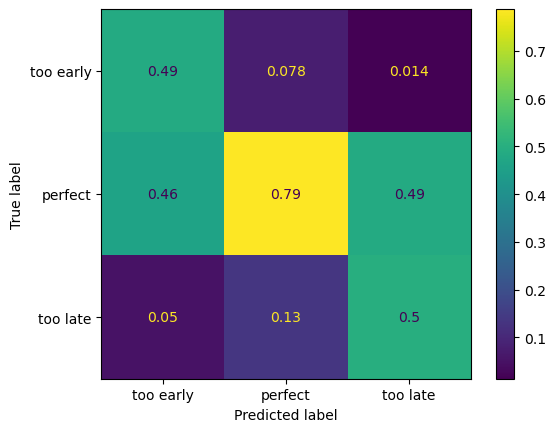

In [9]:
params = {
  'max_depth': 80, 
  'max_features': 4, 
  'min_samples_leaf': 3, 
  'min_samples_split': 10, 
  'n_estimators': 100
  }
random_forest_results(df_complete, all_numeric_features, all_nominal_features, params, True)

In [150]:
# train the model 
# forest_classifier = Pipeline(
#   steps=[
#     ("preprocessor", preprocessor),
#     ("forest classifier", RandomForestClassifier(n_estimators=100, random_state=42)),
#   ]
# )
# all_numeric_features = [
#   'DISTANCE_M', 'DELAY', 'NUMBER_CARRIAGES', 'PLAN_TURNOVER_TIME', 
#   'REALIZED_TURNOVER_TIME', 'MAX_DEPARTURE_TIME', 'PLAN_SIGNAL_SAFE_DELAY', 
#   'DAY_OF_WEEK_sin', 'DAY_OF_WEEK_cos', 'HOUR_sin', 'HOUR_cos', 
#   'NEEDED_PLAN_TURNOVER_TIME', 'NEEDED_REALIZED_TURNOVER_TIME', 'DIFF_TURNOVER_TIME'
#   ]



temp_nominal_data = df_complete[all_nominal_features].apply(LabelEncoder().fit_transform)
temp_nominal_data.columns = all_nominal_features

temp_numeric_data = df_complete[all_numeric_features]
temp_numeric_data.columns = all_numeric_features


temp_final = pd.concat([temp_nominal_data, temp_numeric_data], axis=1, ignore_index=True)
use_features = (all_nominal_features + all_numeric_features)
temp_final.columns = use_features

forest_feat_imp = RandomForestClassifier(n_estimators=100, random_state=42)

# split into X-feature and Y-target datasets
x = temp_final[use_features]
y = df_complete[target_feature]

# split train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
# 80% train, 20% test is generally recommended
# x_train.head()


forest_feat_imp.fit(x_train, y_train)
importance = forest_feat_imp.feature_importances_


number of columns: 23, which are: 
Index(['TRAINSERIE', 'STATION', 'ACTIVITYTYPE', 'ROLLINGSTOCK_TYPE',
       'DRIVER_CHANGE', 'DALUREN', 'DAY_OF_WEEK', 'HOUR', 'TURNOVER_INDICATOR',
       'TRAINNUMBER', 'PREVIOUS_TRAINNUMBER', 'COMBINE', 'SPLIT', 'DISTANCE_M',
       'DELAY', 'NUMBER_CARRIAGES', 'PLAN_TURNOVER_TIME', 'MAX_DEPARTURE_TIME',
       'PLAN_SIGNAL_SAFE_DELAY', 'DAY_OF_WEEK_sin', 'DAY_OF_WEEK_cos',
       'HOUR_sin', 'HOUR_cos'],
      dtype='object')


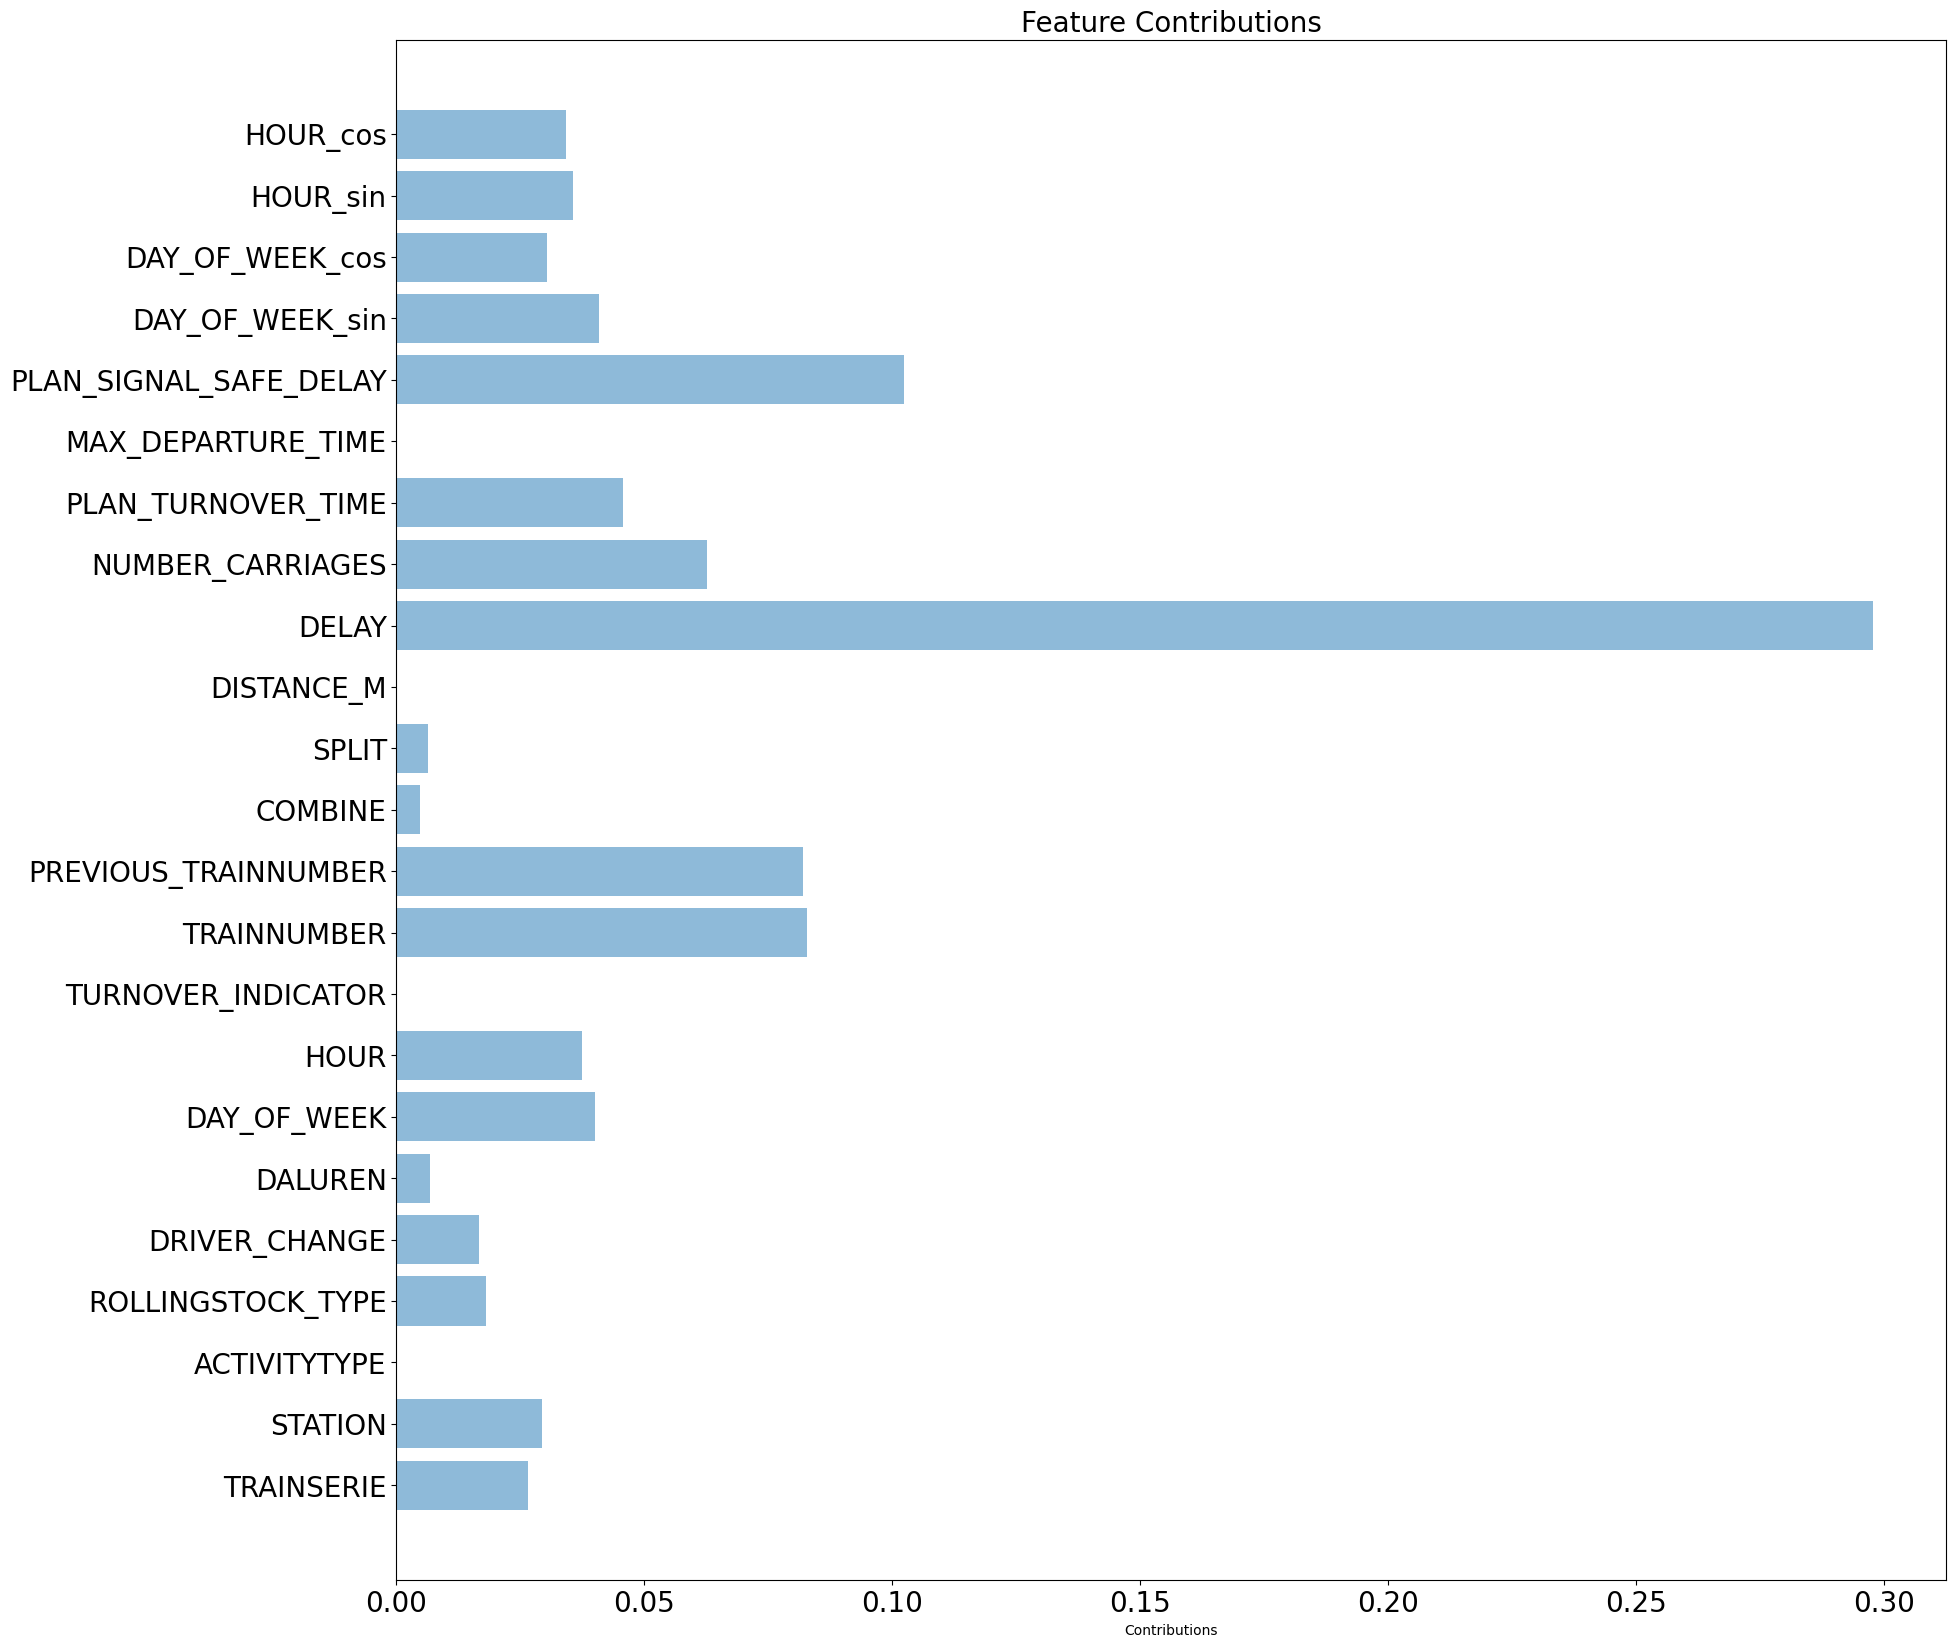

In [152]:
print(f"number of columns: {len(x.columns)}, which are: \n{x.columns}")

objects= x.columns
y_pos = np.arange(len(objects))
performance = importance

fig, ax = plt.subplots(figsize=(20, 20))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects,fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Contributions')
plt.title('Feature Contributions',fontsize=20)
plt.show()

Classification Report:
               precision    recall  f1-score   support

     perfect       0.81      0.93      0.86     36889
   too early       0.48      0.30      0.37      3841
    too late       0.31      0.13      0.18      6626

    accuracy                           0.76     47356
   macro avg       0.53      0.45      0.47     47356
weighted avg       0.71      0.76      0.73     47356

Results rbf SVC:
  Accuracy: 0.7631345552833855
  Precision: 0.7119957364845613
  Recall: 0.7631345552833855
  F1 score: 0.727160191829428


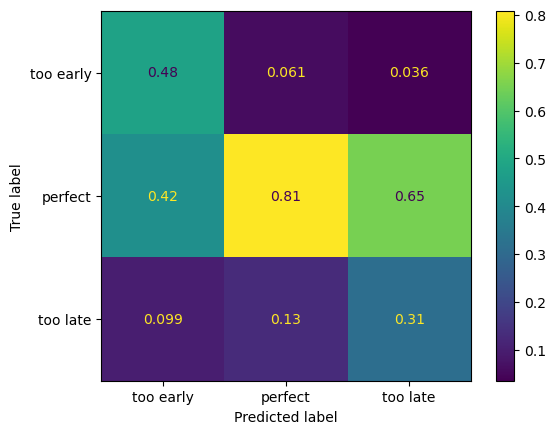

In [153]:
# make predictions on the test set
y_pred_forest_feat_imp = forest_feat_imp.predict(x_test)

# evaluate the model
classification_forest_feat_imp = classification_report(y_test, y_pred_forest_feat_imp)
print(f"Classification Report:\n {classification_forest_feat_imp}")

# Model Accuracy: how often is the classifier correct?
accuracy_forest_feat_imp = accuracy_score(y_test, y_pred_forest_feat_imp)
# Model Precision: what percentage of positive tuples are labeled as such?
precision_forest_feat_imp = precision_score(y_test, y_pred_forest_feat_imp, average='weighted')
# Model Recall: what percentage of positive tuples are labelled as such?
recall_forest_feat_imp = recall_score(y_test, y_pred_forest_feat_imp, average='weighted')
# Model f1: 
f1_forest_feat_imp = f1_score(y_test, y_pred_forest_feat_imp, average='weighted')

# printout
print(f"""Results rbf SVC:
  Accuracy: {accuracy_forest_feat_imp}
  Precision: {precision_forest_feat_imp}
  Recall: {recall_forest_feat_imp}
  F1 score: {f1_forest_feat_imp}""")

# Model confusion matrix: 
confmat_forest_feat_imp = confusion_matrix(y_test, y_pred_forest_feat_imp, labels = ['too early', 'perfect', 'too late'], normalize='pred')
# normalize over predicted conditions calculates the part per class/ column, so if we sum over the columns we get 1. So this shows best for the model how it performs per class
cm_display_forest_feat_imp = ConfusionMatrixDisplay(confmat_forest_feat_imp, display_labels=['too early', 'perfect', 'too late'])

cm_display_forest_feat_imp.plot()
plt.show()

## Features subselection dream tool

In [154]:
# split into X-feature and Y-target datasets
x = df_complete[all_features]
y = df_complete[target_feature]

# split train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
# 80% train, 20% test is generally recommended
x_train.head()

,TRAFFIC_DATE,TRAINNUMBER,TRAINSERIE,TRAINSERIE_DIRECTION,STATION,ACTIVITYTYPE,DISTANCE_M,PLAN_DATETIME,REALIZED_DATETIME,DELAY,TURNOVER_INDICATOR,PREVIOUS_TRAINNUMBER,COMBINE,SPLIT,ROLLINGSTOCK_TYPE,NUMBER_CARRIAGES,DRIVER_CHANGE,DEPARTURE_SIGNAL_SHOWS_SAFE,PLAN_TURNOVER_TIME,REALIZED_TURNOVER_TIME,MAX_DEPARTURE_TIME,PLAN_SIGNAL_SAFE_DELAY,REALIZED_SIGNAL_SAFE_DELAY,DALUREN,DAY_OF_WEEK,HOUR,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,HOUR_sin,HOUR_cos,NEEDED_PLAN_TURNOVER_TIME,NEEDED_REALIZED_TURNOVER_TIME,DIFF_TURNOVER_TIME
60105,2023-01-09,5476,5400.0,E,Zvt,V,NaN,2023-01-09 23:20:00+00:00,2023-01-09 23:19:59+00:00,-1.0,1,5493.0,0,0,SLT,4.0,0.0,2023-01-09 23:19:37+00:00,300.0,327.0,NaN,-23.0,-22.0,True,0,23,0.000000,1.000000,-0.258819,9.659258e-01,361.0,388.0,-27.0
140370,2023-03-09,4058,4000.0,E,Rtd,V,NaN,2023-03-09 16:54:00+00:00,2023-03-09 16:54:04+00:00,4.0,1,4057.0,0,0,SLT,10.0,1.0,2023-03-09 16:53:03+00:00,1200.0,1217.0,NaN,-57.0,-61.0,False,3,16,0.433884,-0.900969,-0.866025,-5.000000e-01,1256.0,1273.0,-17.0
188282,2023-04-06,5189,5100.0,O,Gvc,V,NaN,2023-04-06 22:54:00+00:00,2023-04-06 22:54:09+00:00,9.0,1,5176.0,0,0,SNG,4.0,1.0,2023-04-06 22:53:09+00:00,1080.0,1090.0,NaN,-51.0,-60.0,True,3,22,0.433884,-0.900969,-0.500000,8.660254e-01,1131.0,1141.0,-10.0
57024,2023-01-16,4858,4800.0,E,Hn,V,NaN,2023-01-16 18:06:00+00:00,2023-01-16 18:06:02+00:00,2.0,1,4863.0,0,0,SLT,8.0,0.0,2023-01-16 18:05:32+00:00,720.0,723.0,NaN,-28.0,-30.0,False,0,18,0.000000,1.000000,-1.000000,-1.836970e-16,778.0,781.0,-3.0
205739,2023-04-10,6423,6400.0,O,Tbu,V,NaN,2023-04-10 08:03:00+00:00,2023-04-10 08:03:14+00:00,14.0,1,6424.0,0,0,FLIRT,4.0,0.0,2023-04-10 08:02:50+00:00,300.0,357.0,NaN,-10.0,-24.0,False,0,8,0.000000,1.000000,0.866025,-5.000000e-01,346.0,403.0,-57.0


In [155]:

temp_nominal_data = df_complete[dream_tool_nominal_features].apply(LabelEncoder().fit_transform)
temp_nominal_data.columns = dream_tool_nominal_features

temp_numeric_data = df_complete[dream_tool_numeric_features]
temp_numeric_data.columns = dream_tool_numeric_features


temp_final = pd.concat([temp_nominal_data, temp_numeric_data], axis=1, ignore_index=True)
use_features = (dream_tool_nominal_features + dream_tool_numeric_features)
temp_final.columns = use_features

forest_feat_imp = RandomForestClassifier(n_estimators=100, random_state=42)

# split into X-feature and Y-target datasets
x = temp_final[use_features]
y = df_complete[target_feature]

# split train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
# 80% train, 20% test is generally recommended
# x_train.head()


forest_feat_imp.fit(x_train, y_train)
importance = forest_feat_imp.feature_importances_

number of columns: 9, which are: 
Index(['STATION', 'ROLLINGSTOCK_TYPE', 'DRIVER_CHANGE', 'NUMBER_CARRIAGES',
       'PLAN_TURNOVER_TIME', 'HOUR_sin', 'HOUR_cos', 'DAY_OF_WEEK_sin',
       'DAY_OF_WEEK_cos'],
      dtype='object')


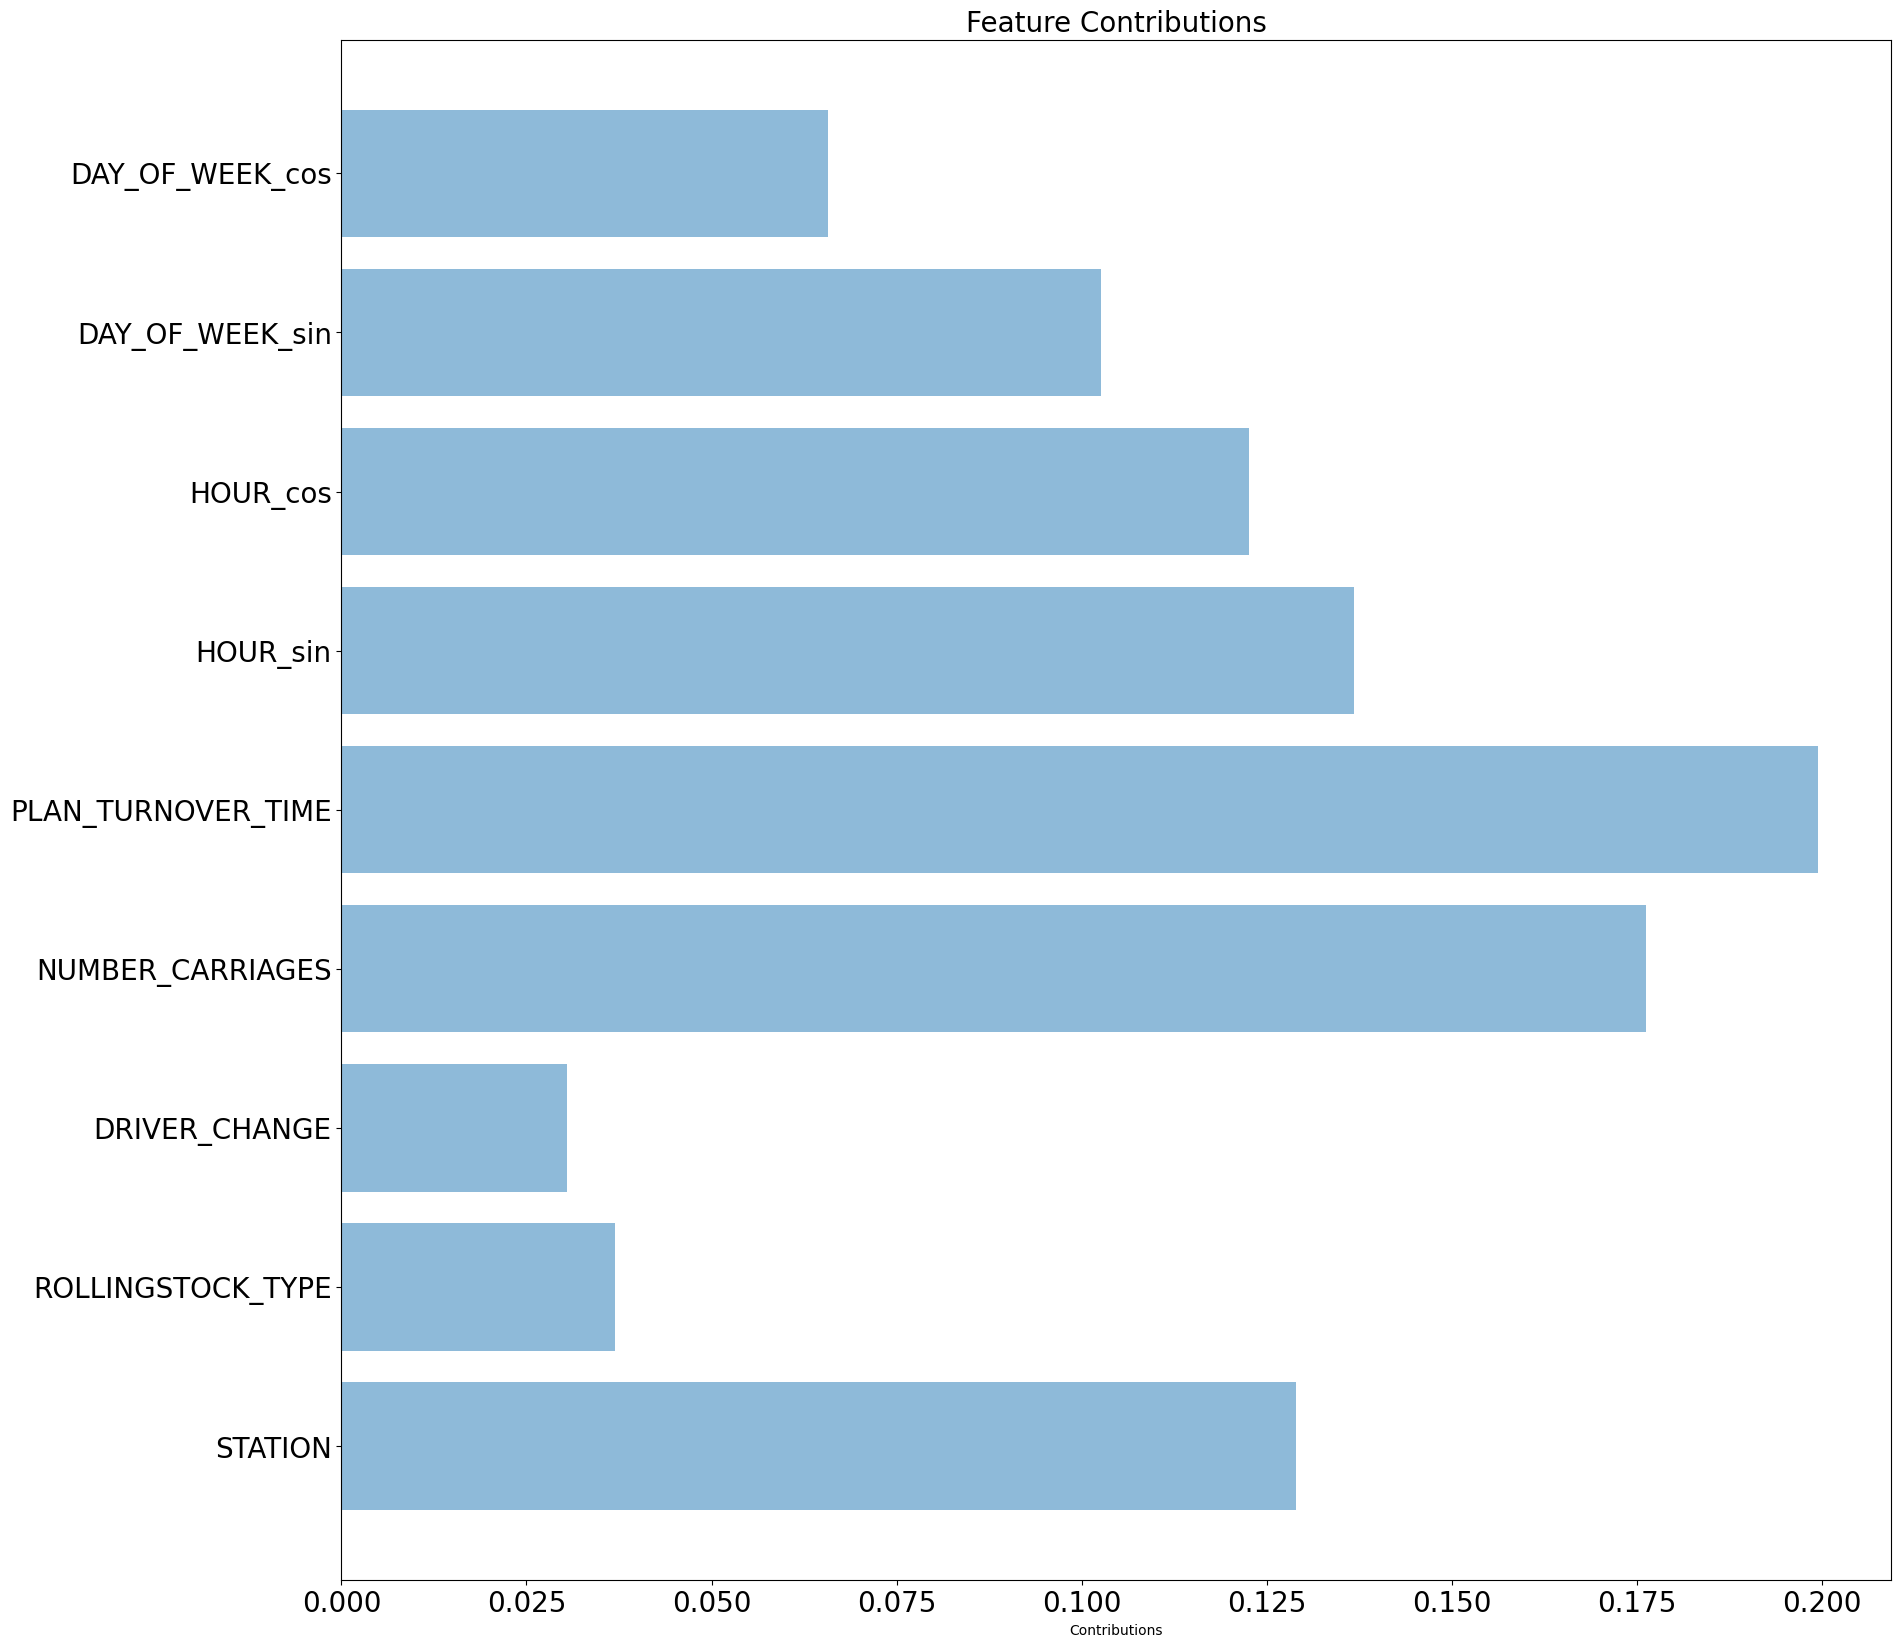

In [156]:
print(f"number of columns: {len(x.columns)}, which are: \n{x.columns}")

objects= x.columns
y_pos = np.arange(len(objects))
performance = importance

fig, ax = plt.subplots(figsize=(20, 20))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects,fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Contributions')
plt.title('Feature Contributions',fontsize=20)
plt.show()

Classification Report:
               precision    recall  f1-score   support

     perfect       0.79      0.92      0.85     36731
   too early       0.30      0.12      0.17      3962
    too late       0.29      0.12      0.17      6663

    accuracy                           0.74     47356
   macro avg       0.46      0.39      0.40     47356
weighted avg       0.68      0.74      0.70     47356

Results rbf SVC:
  Accuracy: 0.7435805388968663
  Precision: 0.6772117696442491
  Recall: 0.7435805388968663
  F1 score: 0.6980527603937607


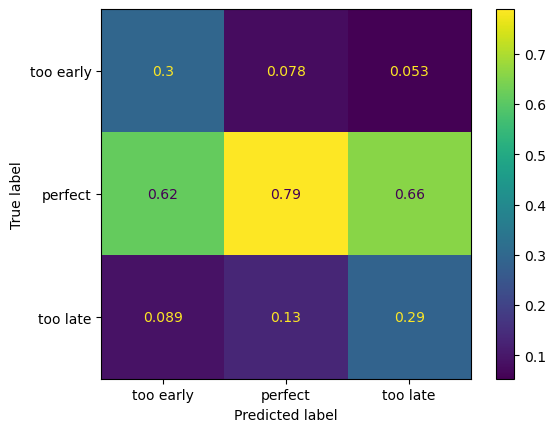

In [157]:
# make predictions on the test set
y_pred_forest_feat_imp = forest_feat_imp.predict(x_test)

# evaluate the model
classification_forest_feat_imp = classification_report(y_test, y_pred_forest_feat_imp)
print(f"Classification Report:\n {classification_forest_feat_imp}")

# Model Accuracy: how often is the classifier correct?
accuracy_forest_feat_imp = accuracy_score(y_test, y_pred_forest_feat_imp)
# Model Precision: what percentage of positive tuples are labeled as such?
precision_forest_feat_imp = precision_score(y_test, y_pred_forest_feat_imp, average='weighted')
# Model Recall: what percentage of positive tuples are labelled as such?
recall_forest_feat_imp = recall_score(y_test, y_pred_forest_feat_imp, average='weighted')
# Model f1: 
f1_forest_feat_imp = f1_score(y_test, y_pred_forest_feat_imp, average='weighted')

# printout
print(f"""Results rbf SVC:
  Accuracy: {accuracy_forest_feat_imp}
  Precision: {precision_forest_feat_imp}
  Recall: {recall_forest_feat_imp}
  F1 score: {f1_forest_feat_imp}""")

# Model confusion matrix: 
confmat_forest_feat_imp = confusion_matrix(y_test, y_pred_forest_feat_imp, labels = ['too early', 'perfect', 'too late'], normalize='pred')
# normalize over predicted conditions calculates the part per class/ column, so if we sum over the columns we get 1. So this shows best for the model how it performs per class
cm_display_forest_feat_imp = ConfusionMatrixDisplay(confmat_forest_feat_imp, display_labels=['too early', 'perfect', 'too late'])

cm_display_forest_feat_imp.plot()
plt.show()

## Feature subsection minimal(?)

In [158]:

temp_nominal_data = df_complete[minimal_nominal_features].apply(LabelEncoder().fit_transform)
temp_nominal_data.columns = minimal_nominal_features

temp_numeric_data = df_complete[minimal_numeric_features]
temp_numeric_data.columns = minimal_numeric_features


temp_final = pd.concat([temp_nominal_data, temp_numeric_data], axis=1, ignore_index=True)
use_features = (minimal_nominal_features + minimal_numeric_features)
temp_final.columns = use_features

forest_feat_imp = RandomForestClassifier(n_estimators=100, random_state=42)

# split into X-feature and Y-target datasets
x = temp_final[use_features]
y = df_complete[target_feature]

# split train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
# 80% train, 20% test is generally recommended
# x_train.head()


forest_feat_imp.fit(x_train, y_train)
importance = forest_feat_imp.feature_importances_

number of columns: 13, which are: 
Index(['TRAINSERIE', 'STATION', 'COMBINE', 'SPLIT', 'ROLLINGSTOCK_TYPE',
       'DALUREN', 'DRIVER_CHANGE', 'NUMBER_CARRIAGES', 'PLAN_TURNOVER_TIME',
       'HOUR_sin', 'HOUR_cos', 'DAY_OF_WEEK_sin', 'DAY_OF_WEEK_cos'],
      dtype='object')


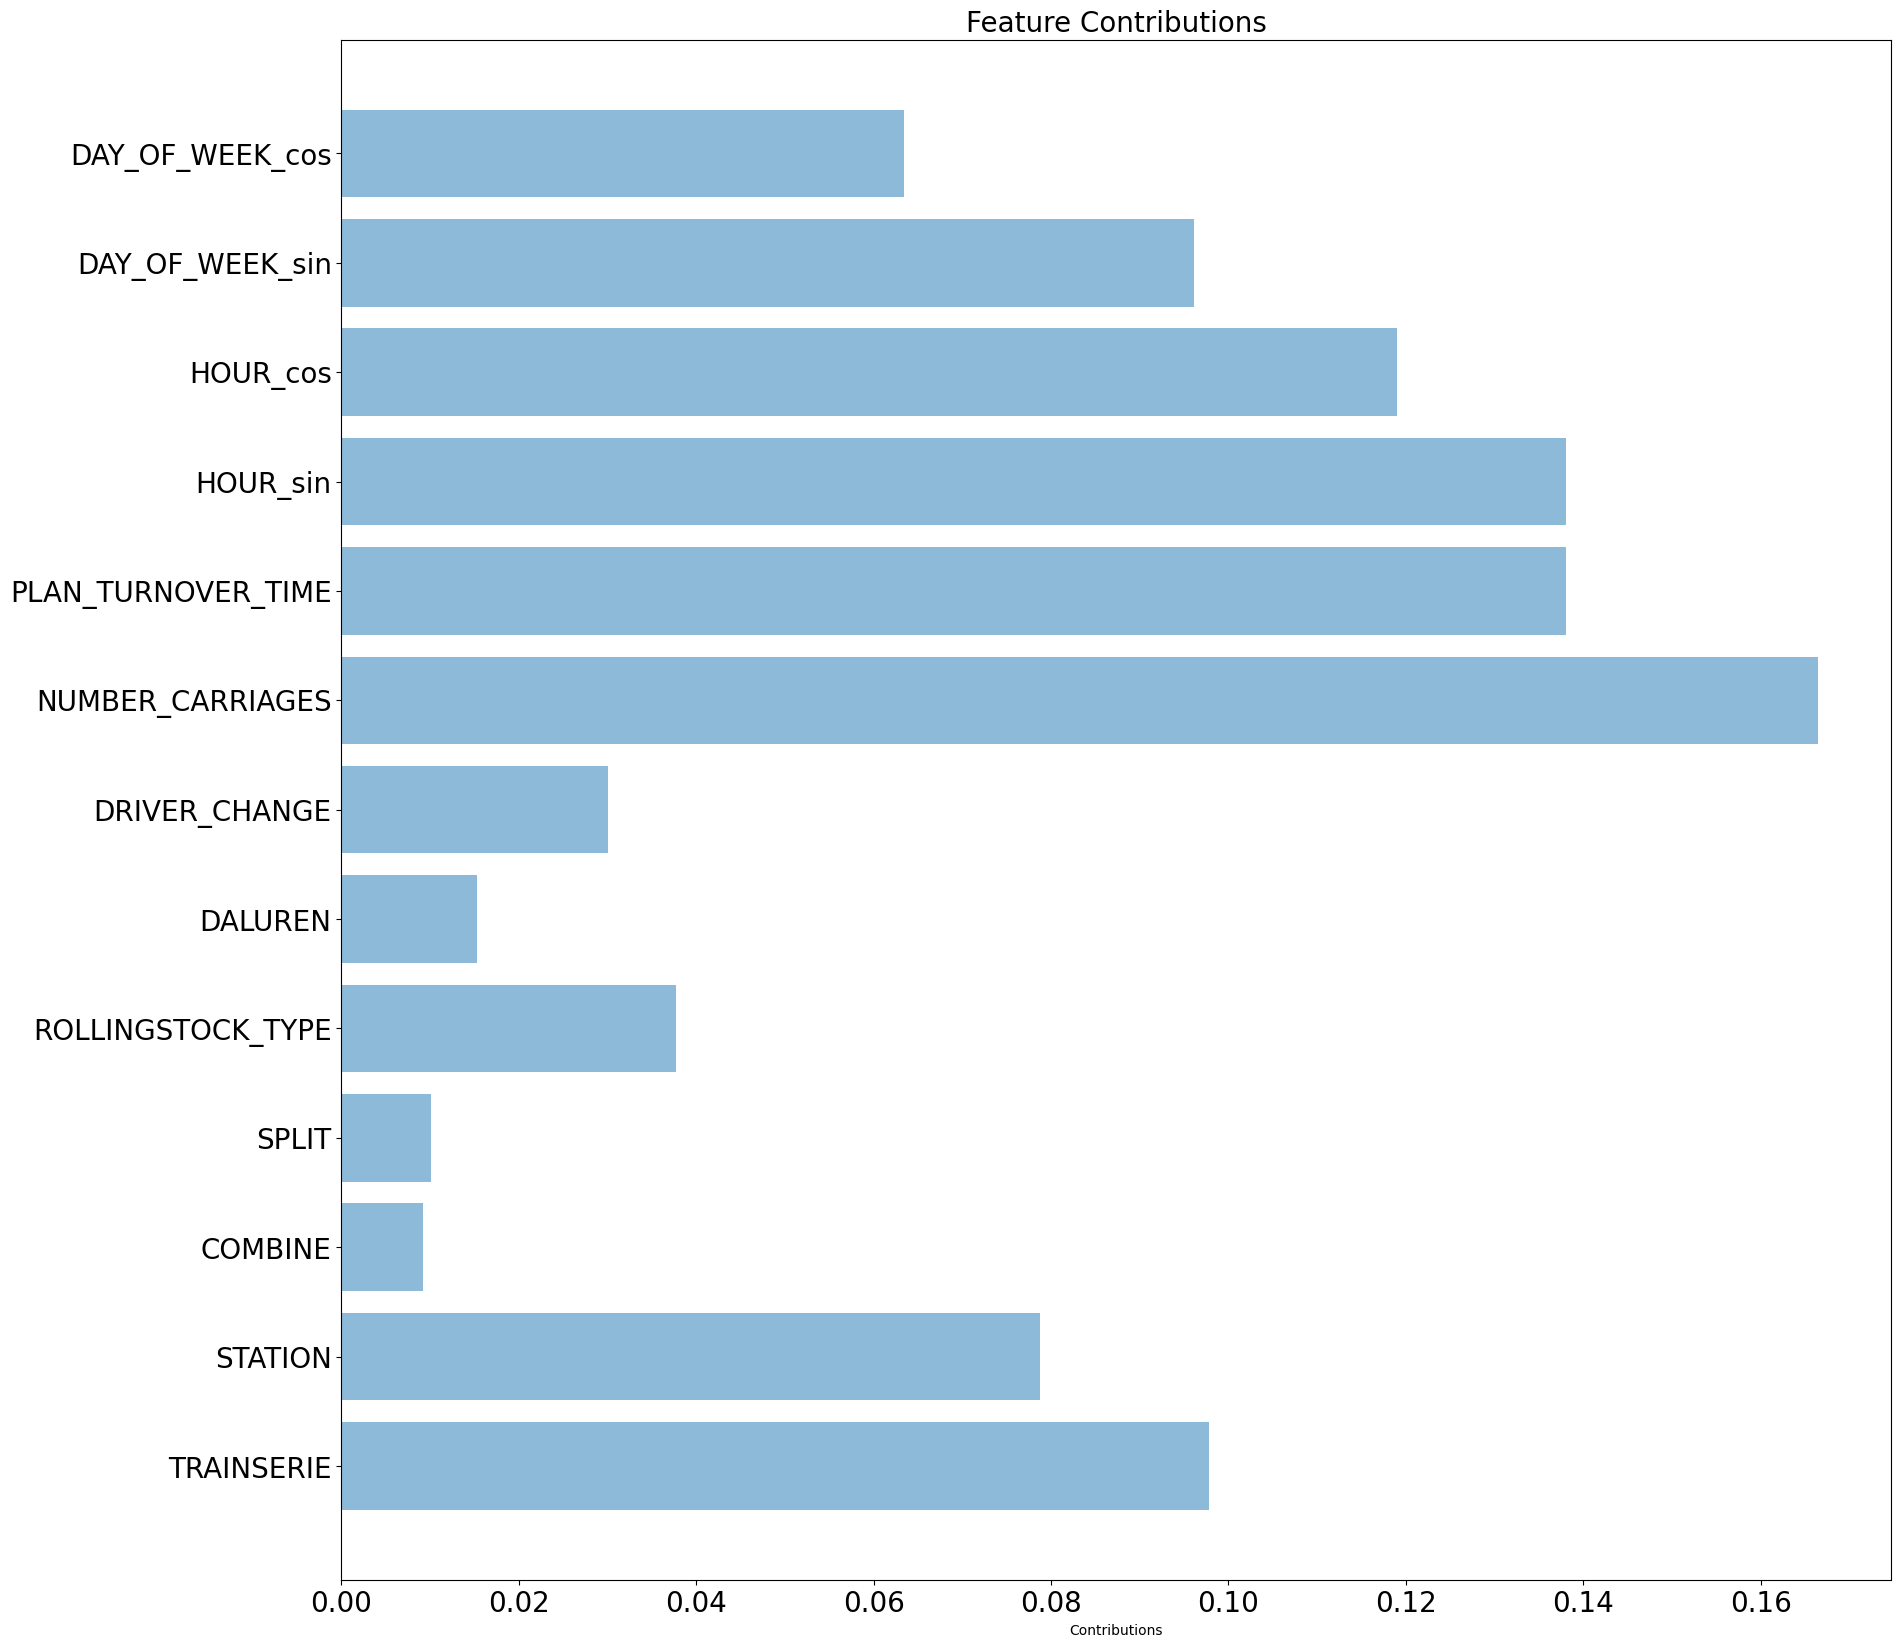

In [159]:
print(f"number of columns: {len(x.columns)}, which are: \n{x.columns}")

objects= x.columns
y_pos = np.arange(len(objects))
performance = importance

fig, ax = plt.subplots(figsize=(20, 20))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects,fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Contributions')
plt.title('Feature Contributions',fontsize=20)
plt.show()

Classification Report:
               precision    recall  f1-score   support

     perfect       0.79      0.92      0.85     36747
   too early       0.31      0.13      0.18      4005
    too late       0.30      0.13      0.18      6604

    accuracy                           0.75     47356
   macro avg       0.47      0.39      0.40     47356
weighted avg       0.68      0.75      0.70     47356

Results rbf SVC:
  Accuracy: 0.7454388039530365
  Precision: 0.6821596961956292
  Recall: 0.7454388039530365
  F1 score: 0.7015990504906404


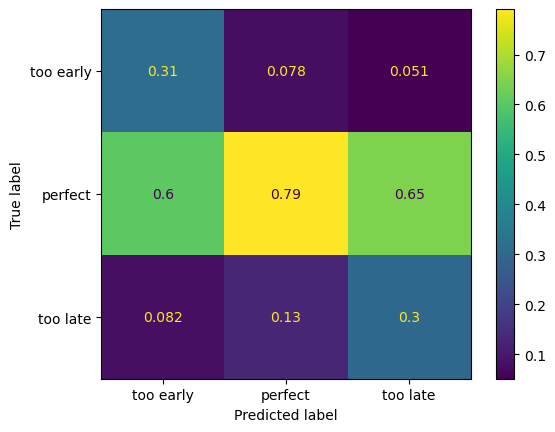

In [160]:
# make predictions on the test set
y_pred_forest_feat_imp = forest_feat_imp.predict(x_test)

# evaluate the model
classification_forest_feat_imp = classification_report(y_test, y_pred_forest_feat_imp)
print(f"Classification Report:\n {classification_forest_feat_imp}")

# Model Accuracy: how often is the classifier correct?
accuracy_forest_feat_imp = accuracy_score(y_test, y_pred_forest_feat_imp)
# Model Precision: what percentage of positive tuples are labeled as such?
precision_forest_feat_imp = precision_score(y_test, y_pred_forest_feat_imp, average='weighted')
# Model Recall: what percentage of positive tuples are labelled as such?
recall_forest_feat_imp = recall_score(y_test, y_pred_forest_feat_imp, average='weighted')
# Model f1: 
f1_forest_feat_imp = f1_score(y_test, y_pred_forest_feat_imp, average='weighted')

# printout
print(f"""Results rbf SVC:
  Accuracy: {accuracy_forest_feat_imp}
  Precision: {precision_forest_feat_imp}
  Recall: {recall_forest_feat_imp}
  F1 score: {f1_forest_feat_imp}""")

# Model confusion matrix: 
confmat_forest_feat_imp = confusion_matrix(y_test, y_pred_forest_feat_imp, labels = ['too early', 'perfect', 'too late'], normalize='pred')
# normalize over predicted conditions calculates the part per class/ column, so if we sum over the columns we get 1. So this shows best for the model how it performs per class
cm_display_forest_feat_imp = ConfusionMatrixDisplay(confmat_forest_feat_imp, display_labels=['too early', 'perfect', 'too late'])

cm_display_forest_feat_imp.plot()
plt.show()

## Recursive feature eleimination

In [161]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [162]:

temp_nominal_data = df_complete[dream_tool_nominal_features].apply(LabelEncoder().fit_transform)
temp_nominal_data.columns = dream_tool_nominal_features

temp_numeric_data = df_complete[dream_tool_numeric_features]
temp_numeric_data.columns = dream_tool_numeric_features


temp_final = pd.concat([temp_nominal_data, temp_numeric_data], axis=1, ignore_index=True)
use_features = (dream_tool_nominal_features + dream_tool_numeric_features)
temp_final.columns = use_features

resursive_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# split into X-feature and Y-target datasets
x = temp_final[use_features]
y = df_complete[target_feature]

# split train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
# 80% train, 20% test is generally recommended
# x_train.head()


# forest_feat_imp.fit(x_train, y_train)
# importance = forest_feat_imp.feature_importances_

In [163]:
# resursive_classifier = Pipeline(
#   steps=[
#     ("preprocessor", preprocessor),
#     ("forest classifier", RandomForestClassifier(n_estimators=100, random_state=42)),
#   ]
# )

rfecv = RFECV(estimator=resursive_classifier, step=1, cv=StratifiedKFold(4), scoring='accuracy')
rfecv.fit(x_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

In [164]:
features=rfecv.n_features_
print(f"initial feature number: {len(all_features)}, after recursive feature elimination: {features}")

initial feature number: 33, after recursive feature elimination: 1


In [165]:
n_p=np.where(rfecv.support_ == False)[0]

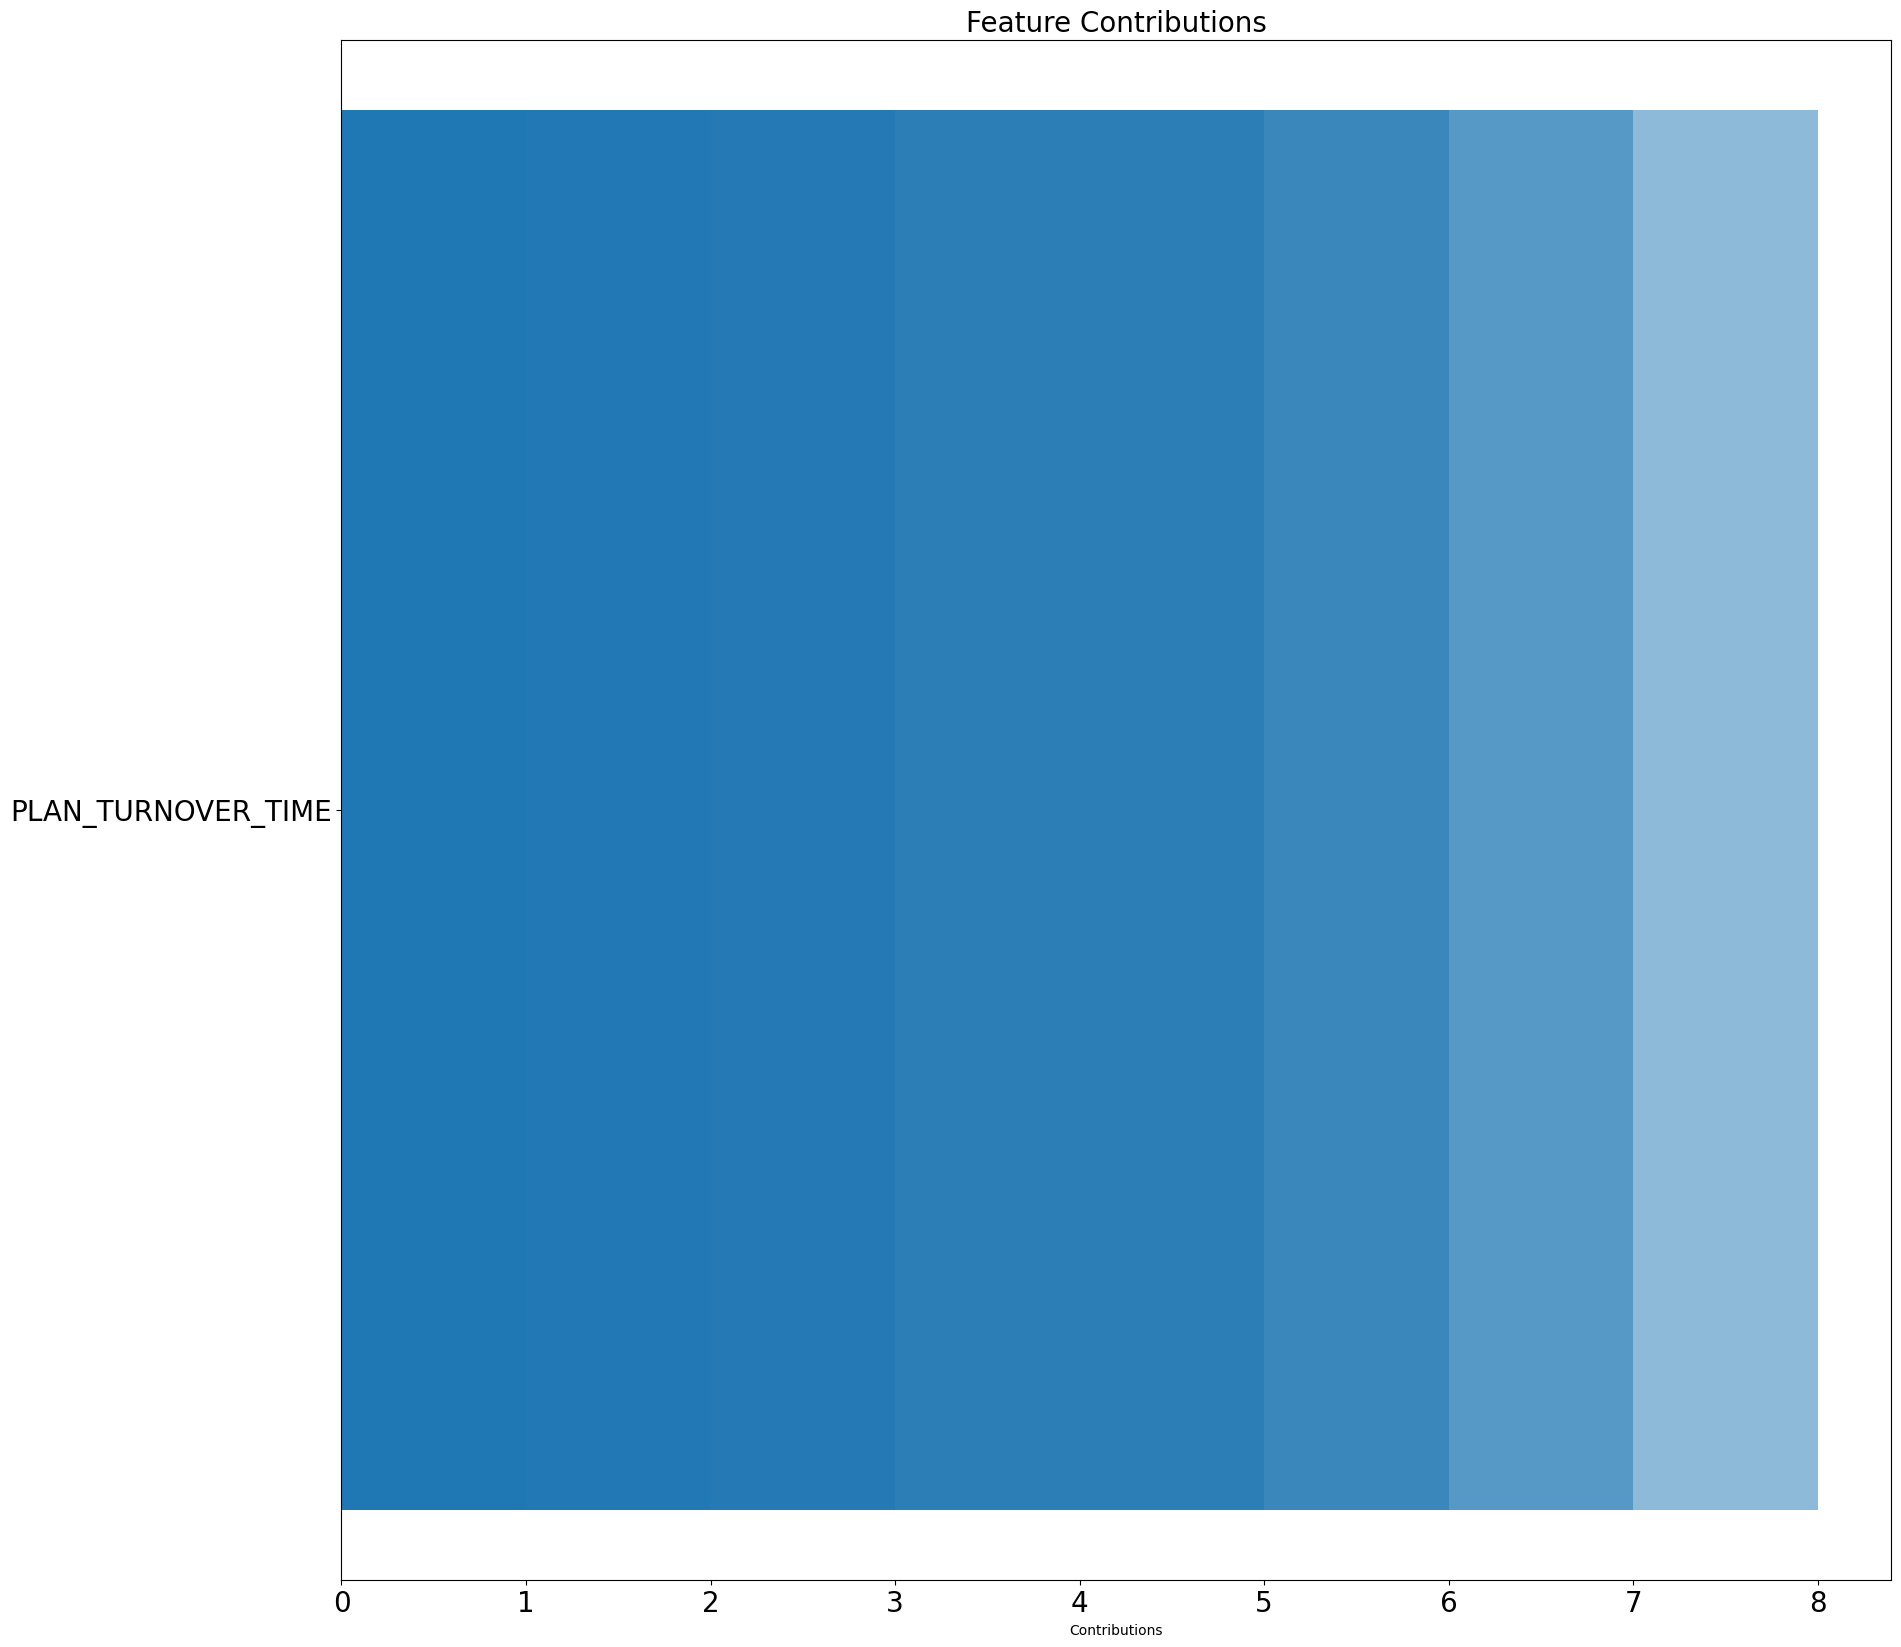

In [166]:
feat=x.columns
to_drop=[]
for i in n_p:
    to_drop.append(feat[i])
x_imp=x.drop(to_drop,axis=1)

objects= x_imp.columns
y_pos = np.arange(len(objects))
performance = n_p
fig, ax = plt.subplots(figsize=(20, 20))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects,fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Contributions')
plt.title('Feature Contributions',fontsize=20)

plt.show()

# SVC feature importance